# Computer Vision 2020-2021
## Lab 1 - Draft Version

### Μέρος 1: Ανίχνευση σε Γκρίζες Εικόνες

In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

#### 1.1 Δημιουργία Εικόνων Εισόδου
#### 1.1.1

Pixels [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Resolution (512, 512)
Range 0 - 255 
New Range 0.0 - 1.0 


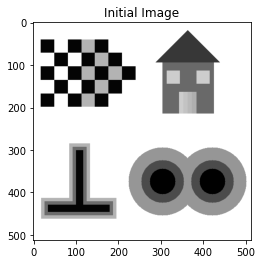

In [8]:
image = cv2.imread("edgetest_10.png", 0)

print("Pixels", image)
print("Resolution" , image.shape)
print("Range {} - {} ".format(image.min(), image.max()))

#normalize
image = image.astype(np.float) / 255
print("New Range {} - {} ".format(image.min(), image.max()))

plt.imshow(image, cmap = "gray") 
plt.title("Initial Image")
plt.show()

#### 1.1.2

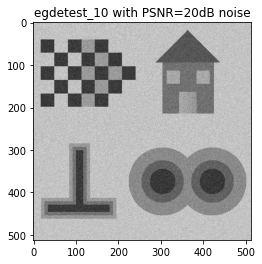

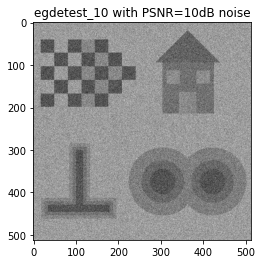

In [9]:
#function that calculates the scale
def getTheScale(picture, PSNR):
    imax = np.max(picture)  
    imin = np.min(picture)
    expon = 10**(PSNR/20) 
    scale = (imax - imin)/expon
    return scale

#PSNR = 20dB
img1 = image + np.random.normal(0,getTheScale(image, 20), image.shape)

#PSNR = 10dB
img2 = image + np.random.normal(0,getTheScale(image, 10), image.shape)

plt.imshow(img1, cmap = "gray") 
plt.title("egdetest_10 with PSNR=20dB noise")
plt.show()

plt.imshow(img2, cmap = "gray") 
plt.title("egdetest_10 with PSNR=10dB noise")
plt.show()

#### 1.2 Υλοποίηση Αλγορίθμων Ανίχνευσης Ακμών
#### 1.2.1

In [12]:
def filtering(eikona, scale, kfilter):
    
    n = int(2*np.ceil(3*scale) + 1)
    Gauss_1D = cv2.getGaussianKernel(n, scale)
    Gauss_2D = Gauss_1D @ Gauss_1D.T 
    
    Gaussian_Eikona = cv2.filter2D(eikona, -1, Gauss_2D)
    LoG_Eikona = cv2.Laplacian(Gaussian_Eikona, cv2.CV_64FC1, 3)
    
    if(kfilter == 0): #gaussian
        Smooth_Eikona = Gaussian_Eikona
    elif(kfilter == 1): #LoG
        Smooth_Eikona = LoG_Eikona
    
    return Smooth_Eikona

In [27]:
def EdgeDetect(eikona, scale, judgeLinear, theta): 
    
    #creation of the kernel B
    B = np.array([[0,-1,0], [-1,4,-1], [0,-1,0]], dtype=np.uint8)
    
    eikona_Gaussian = filtering(eikona, scale, 0)
    
    #judge = 1 for Linear
    if(judgeLinear == 1): 
        eikonaLinear = filtering(eikona,scale,1)
        eikonaLaplacian = eikonaLinear
    
    #judge = 0 for Non-Linear
    elif(judgeLinear == 0):
        eikona_Dilation = cv2.dilate(eikona_Gaussian, B)
        eikona_Erosion = cv2.erode(eikona_Gaussian,B)
        eikonaNonLinear = eikonaMeDilation + eikona_Erosion - 2*eikona_Gaussian
        eikonaLaplacian = eikonaNonLinear
    
    return  eikonaD

#### 1.3 Αξιολόγηση των Αποτελεσμάτων Ανίχνευσης Ακμών
#### 1.3.1

In [28]:
def EdgeOperator(eikona, theta):
    
    B = np.array([[0,1,0], [1,1,1], [0,1,0]], dtype=np.uint8)
    eikona_Dilation = cv2.dilate(eikona, B)
    eikona_Erosion = cv2.erode(eikona,B)
    
    M = eikona_Dilation - eikona_Erosion
    _, T= cv2.threshold(M, theta, 1, cv2.THRESH_BINARY)
    return T

#### Draft Ends Here